In [37]:
# loading the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [33]:
# Loading the data

train = pd.read_csv("train.csv")

train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# checking for null values
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [4]:
# removing missing columns 

train = train.drop(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis=1)

train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [5]:
# We can replace the missing values in LotFrontage with the average value

train['LotFrontage'].fillna('70')

0        65
1        80
2        68
3        60
4        84
5        85
6        75
7        70
8        51
9        50
10       70
11       85
12       70
13       91
14       70
15       51
16       70
17       72
18       66
19       70
20      101
21       57
22       75
23       44
24       70
25      110
26       60
27       98
28       47
29       60
       ... 
1430     60
1431     70
1432     60
1433     93
1434     80
1435     80
1436     60
1437     96
1438     90
1439     80
1440     79
1441     70
1442     85
1443     70
1444     63
1445     70
1446     70
1447     80
1448     70
1449     21
1450     60
1451     78
1452     35
1453     90
1454     62
1455     62
1456     85
1457     66
1458     68
1459     75
Name: LotFrontage, Length: 1460, dtype: object

In [6]:
# dropping missing values

train = train.dropna()

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1094 entries, 0 to 1459
Data columns (total 76 columns):
Id               1094 non-null int64
MSSubClass       1094 non-null int64
MSZoning         1094 non-null object
LotFrontage      1094 non-null float64
LotArea          1094 non-null int64
Street           1094 non-null object
LotShape         1094 non-null object
LandContour      1094 non-null object
Utilities        1094 non-null object
LotConfig        1094 non-null object
LandSlope        1094 non-null object
Neighborhood     1094 non-null object
Condition1       1094 non-null object
Condition2       1094 non-null object
BldgType         1094 non-null object
HouseStyle       1094 non-null object
OverallQual      1094 non-null int64
OverallCond      1094 non-null int64
YearBuilt        1094 non-null int64
YearRemodAdd     1094 non-null int64
RoofStyle        1094 non-null object
RoofMatl         1094 non-null object
Exterior1st      1094 non-null object
Exterior2nd      1094 non

In [8]:
# dropping missing columns and data that doesn't tell much

train = train.drop(['Id','Street','LandContour', 'Utilities', 'LandSlope','Condition1','Condition2','RoofMatl','Heating','CentralAir','Electrical',
                            'Functional','GarageQual','GarageCond','PavedDrive',
                            'SaleType', 'YearBuilt', 'GarageYrBlt', 'GarageArea', 'PoolArea', 'MoSold', 'SaleCondition'], axis=1)

train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,...,GarageFinish,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,YrSold,SalePrice
0,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,7,...,RFn,2,0,61,0,0,0,0,2008,208500
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,6,...,RFn,2,298,0,0,0,0,0,2007,181500
2,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,7,...,RFn,2,0,42,0,0,0,0,2008,223500
3,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,7,...,Unf,3,0,35,272,0,0,0,2006,140000
4,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,8,...,RFn,3,192,84,0,0,0,0,2008,250000


In [9]:
# Calcualting Age of the house which is more relevant information

train['House_Age'] = train['YrSold'] - train['YearRemodAdd'] 


In [10]:
# dropping the now redundant varaibles

train = train.drop(['YrSold','YearRemodAdd'], axis=1)

train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,...,GarageFinish,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,SalePrice,House_Age
0,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,7,...,RFn,2,0,61,0,0,0,0,208500,5
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,6,...,RFn,2,298,0,0,0,0,0,181500,31
2,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,7,...,RFn,2,0,42,0,0,0,0,223500,6
3,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,7,...,Unf,3,0,35,272,0,0,0,140000,36
4,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,8,...,RFn,3,192,84,0,0,0,0,250000,8


In [11]:
# Segregating price from other variables

X = train.loc[:, ['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape',
       'LotConfig', 'Neighborhood', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'GarageType',
       'GarageFinish', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal','House_Age']]

y = train['SalePrice']

In [12]:
# creating dummy variables for categorical variables

# subset all categorical variables
train_categorical = X.select_dtypes(include=['object'])
train_categorical.head()


,MSZoning,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,...,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,KitchenQual,GarageType,GarageFinish
0,RL,Reg,Inside,CollgCr,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,...,PConc,Gd,TA,No,GLQ,Unf,Ex,Gd,Attchd,RFn
1,RL,Reg,FR2,Veenker,1Fam,1Story,Gable,MetalSd,MetalSd,None,...,CBlock,Gd,TA,Gd,ALQ,Unf,Ex,TA,Attchd,RFn
2,RL,IR1,Inside,CollgCr,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,...,PConc,Gd,TA,Mn,GLQ,Unf,Ex,Gd,Attchd,RFn
3,RL,IR1,Corner,Crawfor,1Fam,2Story,Gable,Wd Sdng,Wd Shng,None,...,BrkTil,TA,Gd,No,ALQ,Unf,Gd,Gd,Detchd,Unf
4,RL,IR1,FR2,NoRidge,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,...,PConc,Gd,TA,Av,GLQ,Unf,Ex,Gd,Attchd,RFn


In [13]:
# converting into dummies

train_dummies = pd.get_dummies(train_categorical, drop_first=True)
train_dummies.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,...,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf
0,0,0,1,0,0,0,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
1,0,0,1,0,0,0,1,0,1,0,...,0,0,1,1,0,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
3,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
4,0,0,1,0,0,0,0,0,1,0,...,0,1,0,1,0,0,0,0,1,0


In [14]:
X = X.drop(list(train_categorical.columns), axis=1)

In [15]:
X = pd.concat([X, train_dummies], axis=1)

In [16]:
from sklearn.preprocessing import scale

cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       ...
       'KitchenQual_Fa', 'KitchenQual_Gd', 'KitchenQual_TA',
       'GarageType_Attchd', 'GarageType_Basment', 'GarageType_BuiltIn',
       'GarageType_CarPort', 'GarageType_Detchd', 'GarageFinish_RFn',
       'GarageFinish_Unf'],
      dtype='object', length=154)

In [49]:
# split into train and test - Apparantly, sklearn.cross_validation has changed to sklearn.model_selection

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)


In [18]:
# alphas to tune

params = {"alpha": [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.4s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [19]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.007006,0.001792,0.002000,0.000002,0.0001,{'alpha': 0.0001},-24660.645373,-21667.827092,-23526.152819,-24106.324542,...,-24058.369845,1518.379113,28,-17043.564398,-17381.543421,-16639.904446,-13351.644562,-16055.438193,-16094.419004,1440.795041
1,0.003612,0.001958,0.000600,0.000490,0.001,{'alpha': 0.001},-24659.886772,-21667.427037,-23525.991067,-24106.223329,...,-24057.875811,1518.141757,27,-17043.479111,-17381.528455,-16639.850688,-13351.610195,-16055.417383,-16094.377166,1440.790257
2,0.006251,0.007655,0.000000,0.000000,0.01,{'alpha': 0.01},-24652.344180,-21663.443005,-23524.372783,-24105.211837,...,-24052.972977,1515.807360,26,-17042.657914,-17381.376840,-16639.315127,-13351.267142,-16055.207222,-16093.964849,1440.746193
3,0.007406,0.009253,0.003726,0.006063,0.05,{'alpha': 0.05},-24619.733045,-21646.087848,-23517.166398,-24100.943404,...,-24032.000742,1506.232217,25,-17039.171824,-17380.747067,-16637.028634,-13349.755924,-16054.231201,-16092.186930,1440.582421
4,0.007607,0.001856,0.002402,0.001359,0.1,{'alpha': 0.1},-24580.882658,-21625.149607,-23508.141762,-24095.644415,...,-24007.369050,1495.846804,24,-17034.914043,-17379.975118,-16634.254087,-13347.897006,-16052.927645,-16089.993580,1440.389812


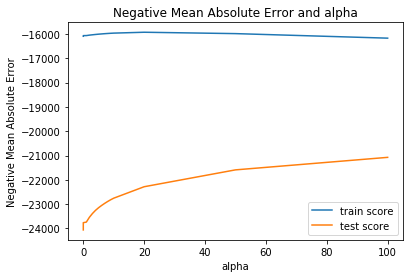

In [20]:
# plotting mean test and train scores with alpha 

cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting

plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='lower right')
plt.show()

In [21]:
# using alpha of 20

alpha = 20
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)


Ridge(alpha=20, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [22]:
ridge.coef_

array([-5.04015026e+03, -2.52287985e+03,  5.85661733e+03,  1.27892516e+04,
        4.97259477e+03,  4.44477016e+03, -5.45919081e+02,  2.29388896e+03,
       -2.05721003e+02,  4.15899542e+01,  3.50602592e+03,  1.60920312e+04,
        4.72286789e+02,  1.60564385e+04,  2.54121777e+03,  5.20728778e+02,
        7.52202862e+03,  2.12354709e+03, -1.15281313e+03, -4.74059506e+03,
        2.71000201e+03,  6.58595251e+02,  9.24899331e+03,  2.61057681e+03,
       -4.57932033e+02, -4.89678020e+02,  2.56415918e+03,  2.36478169e+03,
       -1.25895926e+02, -3.32694520e+03,  3.68076004e+03,  5.87635443e+01,
        2.44410912e+03,  2.11759190e+03,  9.64743185e+02, -4.51711738e+03,
       -8.08048752e+02,  4.41859459e+03, -1.91797317e+03, -1.17499656e+03,
        3.44570679e+02, -6.63670744e+00, -3.50900246e+02, -1.07507326e+03,
       -1.68744946e+03,  1.53675379e+02,  3.64133642e+03, -4.83167821e+03,
       -5.10799187e+02, -1.11665768e+03, -1.86859345e+03, -3.44800578e+03,
       -4.32658769e+03,  

In [40]:
ridge.predict(X_test)

array([118564.90576209, 104570.74161187, 168307.85939385, 121294.77838284,
       242974.87939903, 394431.95728042, 165199.97304491, 196358.29157447,
       199166.07827618, 151782.25863457,  92851.08780373, 116279.95395395,
       189949.35164575, 188615.43643921, 146393.84257122, 164511.97634882,
        74578.22295323, 110339.96525923, 133491.12759454,  71958.59360959,
       236694.04067934, 117082.26144365, 151380.4545512 , 368985.05082829,
       109846.28411582, 256922.42635526, 307832.08896476, 149565.54619344,
        86985.5766816 , 131233.01749069, 258042.37265177, 161021.14632279,
       379923.78516083, 103316.91207985, 160782.66560497, 103780.67050817,
       157675.96402067, 147847.36659975, 254844.67445857, 129305.21685208,
       252034.45780589, 117957.23240009, 149540.2620565 , 339119.5131049 ,
       330683.84588641, 215423.4732703 , 151370.55457419, 111946.66746612,
        96808.5983329 , 170433.77047282, 217686.23451554, 133302.73512097,
       151586.29993281, 1

In [23]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:   17.6s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [24]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.142796,0.006839,0.000400,0.000800,0.0001,{'alpha': 0.0001},-24645.773555,-21786.923542,-23525.400676,-24106.474976,...,-24066.297621,1460.701248,28,-17043.258033,-17382.127567,-16639.271114,-13351.638760,-16055.186703,-16094.296435,1440.814716
1,0.138724,0.010946,0.000000,0.000000,0.001,{'alpha': 0.001},-24645.727276,-21786.717351,-23525.350251,-24106.470688,...,-24066.229108,1460.754979,27,-17043.253785,-17382.125517,-16639.267038,-13351.636201,-16055.186348,-16094.293778,1440.814458
2,0.136211,0.012064,0.000200,0.000400,0.01,{'alpha': 0.01},-24645.264522,-21784.655436,-23524.845999,-24106.427812,...,-24065.543993,1461.292371,26,-17043.213229,-17382.107352,-16639.227807,-13351.613674,-16055.182804,-16094.268973,1440.811496
3,0.142051,0.003883,0.003926,0.005919,0.05,{'alpha': 0.05},-24643.208301,-21775.491432,-23522.604869,-24106.237251,...,-24062.499172,1463.682594,25,-17043.033875,-17382.029330,-16639.057517,-13351.514709,-16055.178947,-16094.162876,1440.798741
4,0.143851,0.005743,0.001001,0.000633,0.1,{'alpha': 0.1},-24640.639029,-21764.030742,-23520.382300,-24105.999050,...,-24058.808059,1466.633826,24,-17042.815024,-17381.936746,-16638.845872,-13351.391003,-16055.179331,-16094.033595,1440.784452


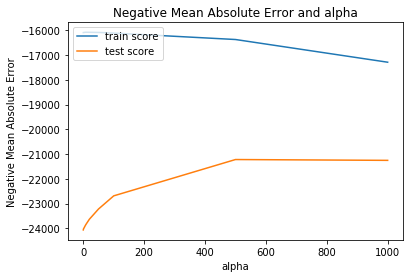

In [25]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [26]:
alpha = 510

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=510, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [27]:
lasso.coef_

array([ -4855.33559126,  -1563.7601678 ,   5844.46396595,  16072.25631587,
         4291.95322354,   3331.97705472,      0.        ,    203.4560687 ,
           -0.        ,      0.        ,      0.        ,   5078.25841932,
            0.        ,  23525.05004173,   2098.86515192,    181.73308689,
         6511.18589126,    718.85400299,    -95.13223115,  -4505.3940352 ,
          721.48573863,    296.71200068,   9108.22534704,   1966.65684939,
           -0.        ,   -780.65141284,   1759.7029489 ,   1924.05711382,
           -0.        ,  -3966.94397493,   1728.42956073,     -0.        ,
            0.        ,   -457.68737988,    370.00587801,  -4434.81598605,
         -776.60791311,   3900.24138399,   -822.60972682,   -711.78921881,
            0.        ,     -0.        ,     -0.        ,      0.        ,
         -557.20630664,    408.31736418,   4006.68588091,  -2782.56747564,
            0.        ,     -0.        ,   -916.5970498 ,  -1641.89470044,
        -1074.72624389,  

In [50]:
lasso.predict(X_test)

array([130233.414245  , 103104.74150137, 172072.84569653, 115088.40050319,
       234351.89733791, 377425.88634775, 163605.95312424, 192606.2497859 ,
       193652.91359604, 159295.93427477, 105857.81719075, 117324.42248864,
       188453.70715232, 179503.49660598, 137765.22817926, 164410.71007683,
        79378.73280949, 109874.66770873, 128158.78918939,  83801.01187064,
       239473.79034559, 120387.99941342, 139517.32317013, 346774.04731633,
       106776.06130331, 265475.85901924, 303648.93575316, 168080.8213065 ,
        94763.39398285, 138026.87174759, 255153.62193638, 157029.06345255,
       372698.8080864 ,  99342.05175383, 177696.83351658, 101060.13554227,
       145626.14462551, 148463.09813762, 255096.21074986, 125340.09049359,
       247032.94509769, 118791.95096569, 151950.98975264, 342079.0245261 ,
       330003.08441327, 210265.58420291, 151194.04247546, 110203.32566013,
        91328.47945284, 172852.17985024, 218129.05461812, 137635.27380761,
       146129.02744444, 1